In [2]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(hrbrthemes)))
suppressWarnings(suppressMessages(library(forcats)))
suppressWarnings(suppressMessages(library(glue)))
suppressWarnings(suppressMessages(library(viridis)))
suppressWarnings(suppressMessages(library(ggdendro)))
suppressWarnings(suppressMessages(library(grid)))
suppressWarnings(suppressMessages(library(colorspace)))
suppressWarnings(suppressMessages(library(cowplot)))
suppressWarnings(suppressMessages(library(ComplexHeatmap)))
library("latex2exp")
suppressWarnings(suppressMessages(library(gridExtra)))
library(broom)
suppressWarnings(suppressMessages(library(tidyverse)))
options(repr.plot.width=6, repr.plot.height=6)
library(plotrix)
library("png")
library("raster")
library('topicmodels')
library(transport)
library('umap')

Warning message:
"package 'latex2exp' was built under R version 4.2.2"
Warning message:
"package 'broom' was built under R version 4.2.3"
Warning message:
"package 'raster' was built under R version 4.2.1"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.2.1"

Attaching package: 'raster'


The following object is masked from 'package:dplyr':

    select


Warning message:
"package 'topicmodels' was built under R version 4.2.3"
Warning message:
"package 'transport' was built under R version 4.2.3"
Warning message:
"package 'umap' was built under R version 4.2.3"


In [3]:
library('philentropy')

Warning message:
"package 'philentropy' was built under R version 4.2.2"

Attaching package: 'philentropy'


The following object is masked from 'package:raster':

    distance




In [4]:
# Read Wild-type Inference File
# Select only canavanine,heat,oxidative.peroxide posteriors 
# Add column of maximum posterior for filtration purposes

In [44]:
wt_r <- read.csv("WT_peter_UC_processed__inference_oak_1.csv",skip=1,header=TRUE)%>%dplyr::select(-H,-Top_Level,-canavanine,-heat,-oxidative.peroxide,-contains("none"))%>%
mutate(CN_L=dplyr::select(.,contains("canavanine....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_M=dplyr::select(.,contains("canavanine....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_H=dplyr::select(.,contains("canavanine....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_L=dplyr::select(.,contains("heat....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_M=dplyr::select(.,contains("heat....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_H=dplyr::select(.,contains("heat....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_L=dplyr::select(.,contains("oxidative.peroxide....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_M=dplyr::select(.,contains("oxidative.peroxide....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_H=dplyr::select(.,contains("oxidative.peroxide....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
dplyr::select(HT_L,OS_L,OS_M,OS_H)%>%rowwise()%>% mutate(max_r = max(HT_L,OS_L,OS_M,OS_H))

In [45]:
# Calculate JSD between canavanine,heat,oxidative.peroxide for components Posterior > 0.05 but also rest of them aggregated through colSums
# Add row and column names to matrix and convert to data frame
# Add diagonal element as NA and zero divergence as NA

In [46]:
wt_JSD <- JSD(t(as.matrix(rbind(wt_r%>%filter(max_r>=0.05),colSums(wt_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(wt_JSD) <- list(c("HT:L","OS:L","OS:M","OS:H"), 
                         c("HT:L","OS:L","OS:M","OS:H"))
wt_JSD <- as.data.frame(as.table(wt_JSD))
wt_JSD[wt_JSD == 0] <- NA
wt_JSD <- wt_JSD%>%mutate(Freq=case_when(Var1==Var2 ~ 0,TRUE ~ as.double(Freq)))
wt_JSD$Freq[wt_JSD$Freq == 0] <- NA

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 4 vectors.



In [47]:
# Plot the divergences

In [48]:
options(repr.plot.width=7, repr.plot.height=6) 
p1<- ggplot(wt_JSD, aes(Var1,Var2, fill= Freq)) + 
  geom_tile(color="gray")  +
   scale_fill_viridis(discrete = FALSE)  +
  theme_ipsum()+xlab("")+ylab("")+theme_minimal()+
theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 18),plot.title = element_text(size = 18),
     panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ggtitle("Wild-type")+labs(fill='JS Divergence(log2)') +
scale_x_discrete(limits = c("HT:L","OS:L","OS:M","OS:H"))+
scale_y_discrete(limits = c("HT:L","OS:L","OS:M","OS:H"))

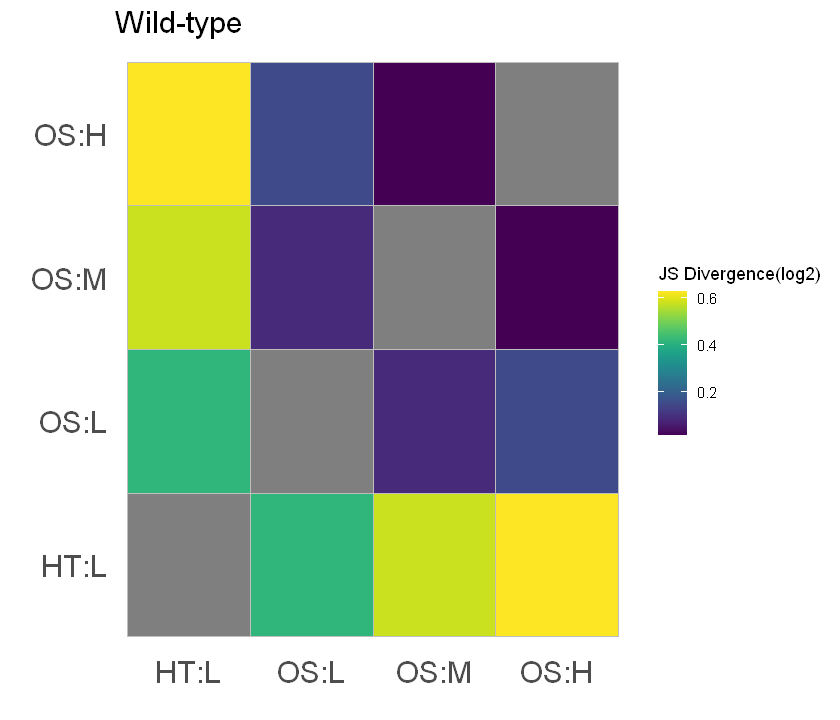

In [49]:
p1

In [50]:
#CLPA

In [51]:
dclpa_r <- read.csv("DCLPA_peter_UC_processed__inference_oak_1.csv",skip=1,header=TRUE)%>%dplyr::select(-H,-Top_Level,-canavanine,-heat,-oxidative.peroxide,-contains("none"))%>%
mutate(CN_L=dplyr::select(.,contains("canavanine....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_M=dplyr::select(.,contains("canavanine....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_H=dplyr::select(.,contains("canavanine....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_L=dplyr::select(.,contains("heat....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_M=dplyr::select(.,contains("heat....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_H=dplyr::select(.,contains("heat....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_L=dplyr::select(.,contains("oxidative.peroxide....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_M=dplyr::select(.,contains("oxidative.peroxide....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_H=dplyr::select(.,contains("oxidative.peroxide....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
dplyr::select(HT_L,OS_L,OS_M,OS_H)%>%rowwise()%>% mutate(max_r = max(HT_L,OS_L,OS_M,OS_H))

In [52]:
# Calculate JSD between canavanine,heat,oxidative.peroxide for components Posterior > 0.05 but also rest of them aggregated through colSums
# Add row and column names to matrix and convert to data frame
# Add diagonal element as NA and zero divergence as NA

In [53]:
dclpa_JSD <- JSD(t(as.matrix(rbind(dclpa_r%>%filter(max_r>=0.05),colSums(wt_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(dclpa_JSD) <- list(c("HT:L","OS:L","OS:M","OS:H"), 
                         c("HT:L","OS:L","OS:M","OS:H"))
dclpa_JSD <- as.data.frame(as.table(dclpa_JSD))
dclpa_JSD[dclpa_JSD == 0] <- NA
dclpa_JSD <- dclpa_JSD%>%mutate(Freq=case_when(Var1==Var2 ~ 0,TRUE ~ as.double(Freq)))
dclpa_JSD$Freq[dclpa_JSD$Freq == 0] <- NA

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 4 vectors.



In [54]:
# Plot the divergences

In [55]:

p2<- ggplot(dclpa_JSD, aes(Var1,Var2, fill= Freq)) + 
  geom_tile(color="gray")  +
   scale_fill_viridis(discrete = FALSE)  +
  theme_ipsum()+xlab("")+ylab("")+theme_minimal()+
theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 18),plot.title = element_text(size = 18),
     panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ggtitle("CLPA")+labs(fill='JS Divergence(log2)') +
scale_x_discrete(limits = c("HT:L","OS:L","OS:M","OS:H"))+
scale_y_discrete(limits = c("HT:L","OS:L","OS:M","OS:H"))

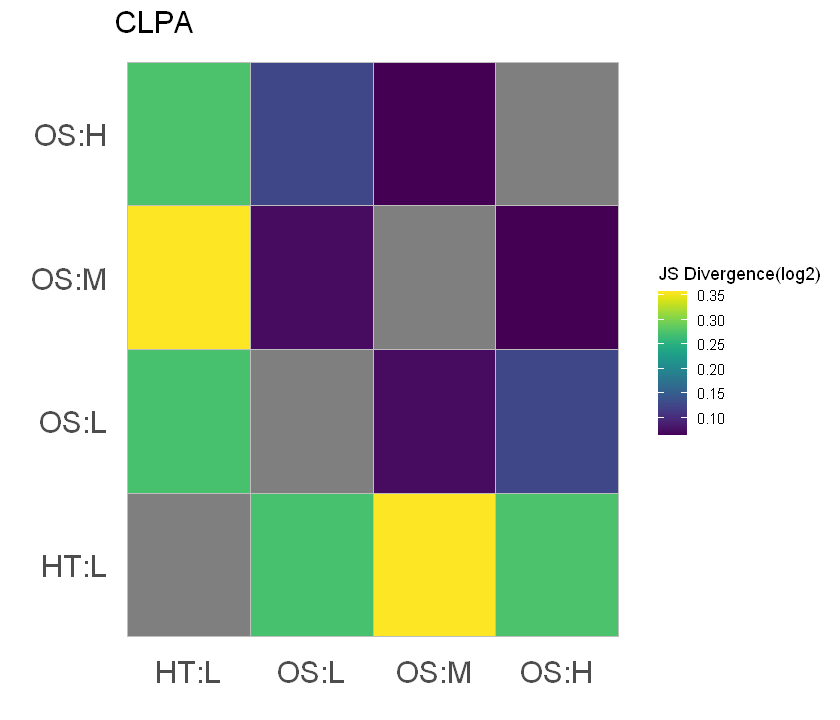

In [56]:
p2

In [57]:
dclpb_r <- read.csv("DCLPB_peter_UC_processed__inference_oak_1.csv",skip=1,header=TRUE)%>%dplyr::select(-H,-Top_Level,-canavanine,-heat,-oxidative.peroxide,-contains("none"))%>%
mutate(CN_L=dplyr::select(.,contains("canavanine....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_M=dplyr::select(.,contains("canavanine....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_H=dplyr::select(.,contains("canavanine....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_L=dplyr::select(.,contains("heat....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_M=dplyr::select(.,contains("heat....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_H=dplyr::select(.,contains("heat....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_L=dplyr::select(.,contains("oxidative.peroxide....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_M=dplyr::select(.,contains("oxidative.peroxide....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_H=dplyr::select(.,contains("oxidative.peroxide....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
dplyr::select(HT_L,OS_L,OS_M,OS_H)%>%rowwise()%>% mutate(max_r = max(HT_L,OS_L,OS_M,OS_H))

In [58]:
# Calculate JSD between canavanine,heat,oxidative.peroxide for components Posterior > 0.05 but also rest of them aggregated through colSums
# Add row and column names to matrix and convert to data frame
# Add diagonal element as NA and zero divergence as NA

In [59]:
dclpb_JSD <- JSD(t(as.matrix(rbind(dclpb_r%>%filter(max_r>=0.05),colSums(wt_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(dclpb_JSD) <- list(c("HT:L","OS:L","OS:M","OS:H"), 
                         c("HT:L","OS:L","OS:M","OS:H"))
dclpb_JSD <- as.data.frame(as.table(dclpb_JSD))
dclpb_JSD[dclpa_JSD == 0] <- NA
dclpb_JSD <- dclpb_JSD%>%mutate(Freq=case_when(Var1==Var2 ~ 0,TRUE ~ as.double(Freq)))
dclpb_JSD$Freq[dclpb_JSD$Freq == 0] <- NA

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 4 vectors.



In [60]:
# Plot the divergences

In [61]:

p3<- ggplot(dclpb_JSD, aes(Var1,Var2, fill= Freq)) + 
  geom_tile(color="gray")  +
   scale_fill_viridis(discrete = FALSE)  +
  theme_ipsum()+xlab("")+ylab("")+theme_minimal()+
theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 18),plot.title = element_text(size = 18),
     panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ggtitle("CLPB")+labs(fill='JS Divergence(log2)') +
scale_x_discrete(limits = c("HT:L","OS:L","OS:M","OS:H"))+
scale_y_discrete(limits = c("HT:L","OS:L","OS:M","OS:H"))

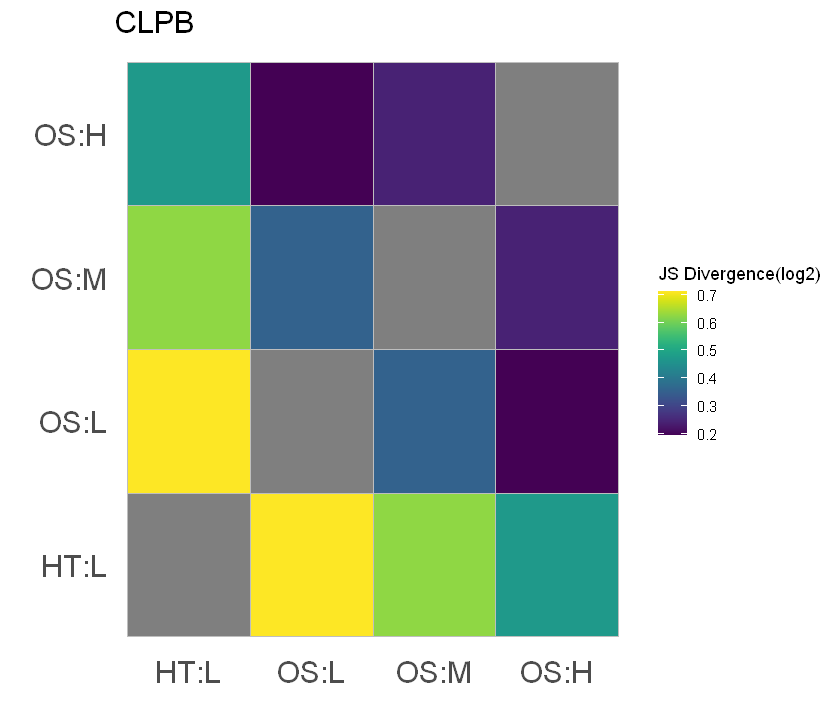

In [62]:
p3

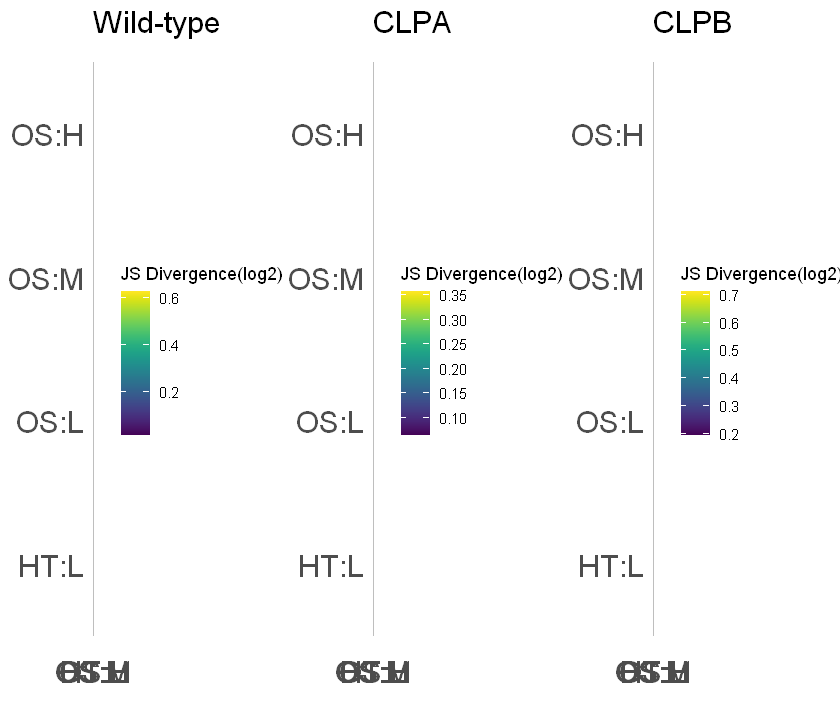

In [63]:
p <- grid.arrange(p1,p2,p3,ncol=3,nrow=1)

In [65]:
ggsave(filename = "../../../PNAS/FIGURES/Fig4_final_v3.pdf",plot = p, width = 21,height = 7, dpi = 300, units = "in")

In [290]:
# Print the divergences

In [292]:
# DKJ

In [293]:
# Read DKJ Inference File
# Select only canavanine,heat,oxidative.peroxide posteriors 
# Add column of maximum posterior for filtration purposes

In [9]:
dkj_r <- read.csv("DKJ_peter_UC_processed__inference_oak_1.csv",skip=1,header=TRUE)%>%dplyr::select(-H,-Top_Level,-canavanine,-heat,-oxidative.peroxide,-contains("none"))%>%
mutate(CN_L=dplyr::select(.,contains("canavanine....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_M=dplyr::select(.,contains("canavanine....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(CN_H=dplyr::select(.,contains("canavanine....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_L=dplyr::select(.,contains("heat....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_M=dplyr::select(.,contains("heat....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(HT_H=dplyr::select(.,contains("heat....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_L=dplyr::select(.,contains("oxidative.peroxide....LOW"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_M=dplyr::select(.,contains("oxidative.peroxide....MEDIUM"))%>%rowMeans(na.rm = TRUE))%>%
mutate(OS_H=dplyr::select(.,contains("oxidative.peroxide....HIGH"))%>%rowMeans(na.rm = TRUE))%>%
dplyr::select(CN_L,CN_M,CN_H,HT_L,HT_M,HT_H,OS_L,OS_M,OS_H)%>%rowwise() %>% 
mutate(max_r = max(CN_L,CN_M,CN_H,HT_L,HT_M,HT_H,OS_L,OS_M,OS_H))

In [296]:
# Calculate JSD between canavanine,heat,oxidative.peroxide for components Posterior > 0.05 but also rest of them aggregated through colSums
# Add row and column names to matrix and convert to data frame
# Add diagonal element as NA and zero divergence as NA

In [10]:
dkj_JSD <- JSD(t(as.matrix(rbind(dkj_r%>%filter(max_r>=0.05),colSums(dkj_r%>%filter(max_r<0.05)))%>%dplyr::select(-max_r))))#%>%
dimnames(dkj_JSD) <- list(c("CN:L","CN:M","CN:H","HT:L","HT:M","HT:H","OS:L","OS:M","OS:H"), 
                         c("CN:L","CN:M","CN:H","HT:L","HT:M","HT:H","OS:L","OS:M","OS:H"))
dkj_JSD <- as.data.frame(as.table(dkj_JSD))
dkj_JSD[dkj_JSD == 0] <- NA
dkj_JSD <- dkj_JSD%>%mutate(Freq=case_when(Var1==Var2 ~ 0,TRUE ~ as.double(Freq)))
dkj_JSD$Freq[dkj_JSD$Freq == 0] <- NA

Metric: 'jensen-shannon' using unit: 'log2'; comparing: 9 vectors.



In [298]:
# Plot the divergences

In [11]:
options(repr.plot.width=10, repr.plot.height=8) 
p2 <- ggplot(dkj_JSD, aes(Var1,Var2, fill= Freq)) + 
  geom_tile(color="gray")  +
   scale_fill_viridis(discrete = FALSE)+
  theme_ipsum()+xlab("")+ylab("")+theme_minimal()+
theme(axis.text.x = element_text(size = 18),axis.text.y = element_text(size = 18),plot.title = element_text(size = 18),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ggtitle("dnaKJ-NI")+labs(fill='JS Divergence(log2)') +
scale_x_discrete(limits = c("CN:L","CN:M","CN:H","HT:L","HT:M","HT:H","OS:L","OS:M","OS:H"))+
scale_y_discrete(limits = c("CN:L","CN:M","CN:H","HT:L","HT:M","HT:H","OS:L","OS:M","OS:H"))

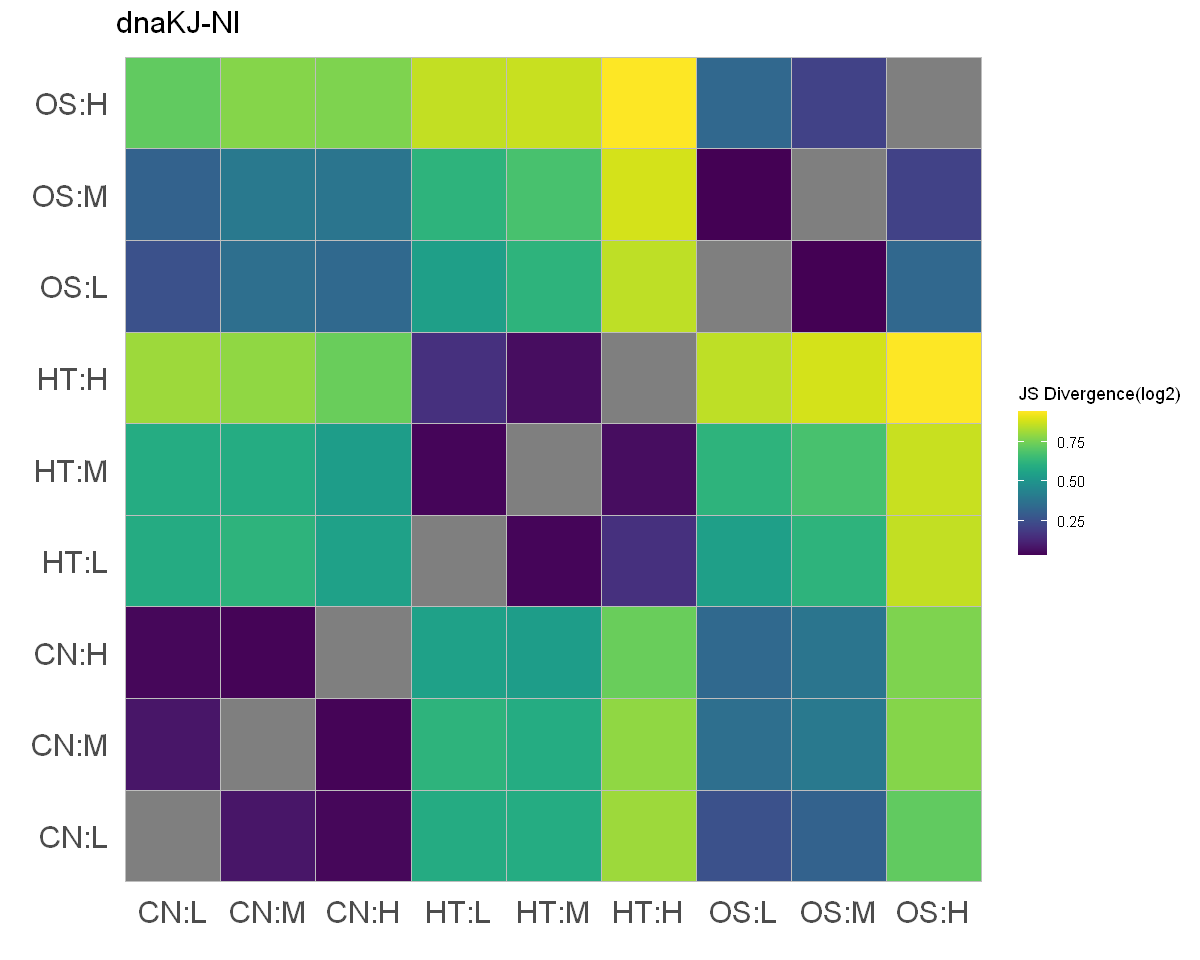

In [12]:
p2

In [301]:
# Print the divergences

In [302]:
dkj_JSD

Var1,Var2,Freq
<fct>,<fct>,<dbl>
canavanine,canavanine,NA
heat,canavanine,0.4428671
oxidative,canavanine,0.3094786
canavanine,heat,0.4428671
heat,heat,NA
oxidative,heat,0.6856851
canavanine,oxidative,0.3094786
heat,oxidative,0.6856851
oxidative,oxidative,NA


In [ ]:
### Read the illustartion figure

In [13]:
p3_1 <- rasterGrob(readPNG(source="Illustration1.png"))
p3_2 <- rasterGrob(readPNG(source="Illustration2.png"))

In [14]:
## Single stress plot for WT

In [18]:
df <- read.table("2023-02-15-wt-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(status=="singlestress")%>%filter(condition!="heat_control")

In [19]:
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(delta_auc), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'delta_auc'] <- 'ci'

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Duplicated aesthetics after name standardisation: size"


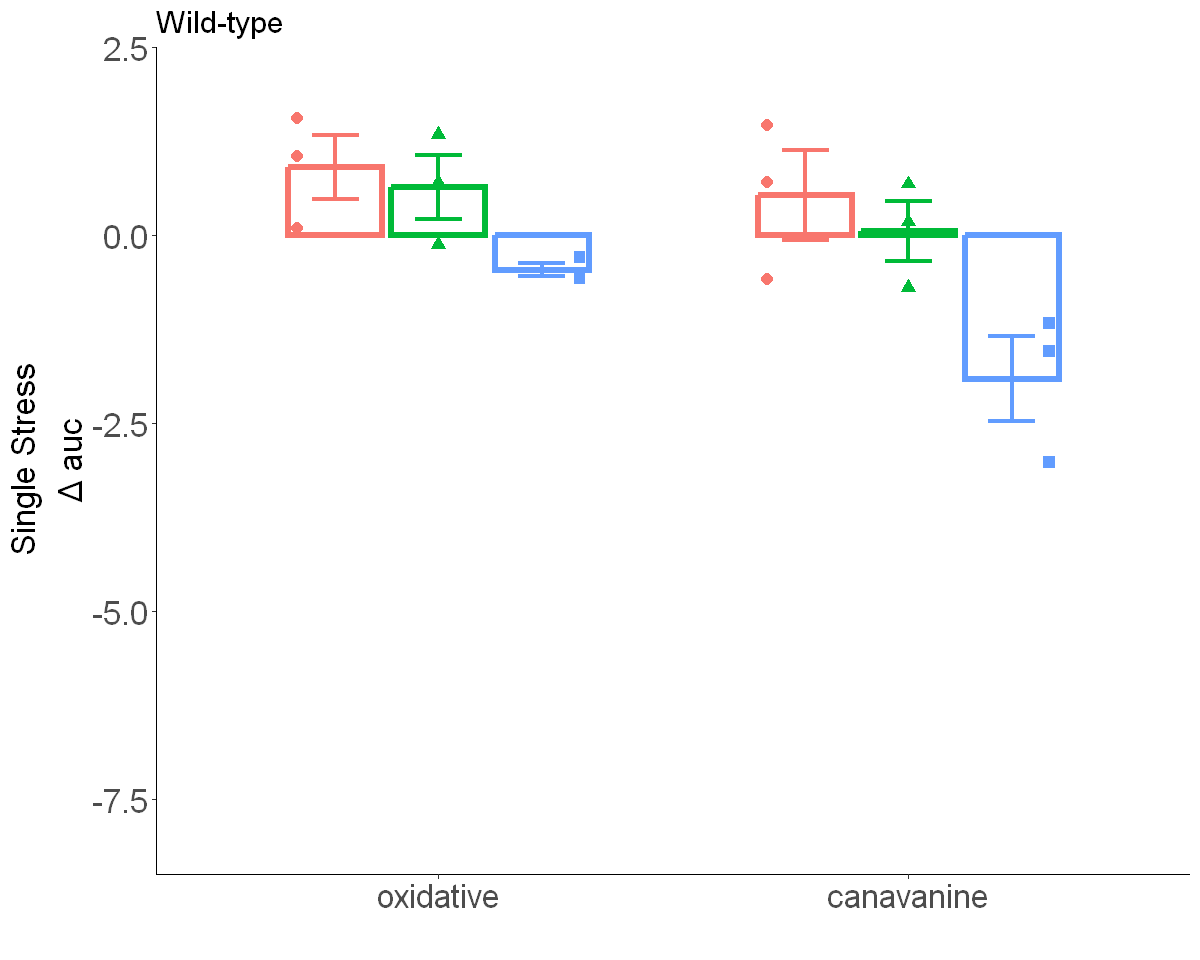

In [20]:
p4 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(-5, -5, -2.5)) +
labs(title="", x = "")+ylab(expression(atop( paste("Single Stress"),"\u394 auc")))+
   theme_classic() +ggtitle("Wild-type")+theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+ylim(-8,2)
p4

In [21]:
## Single stress plot for DKJ

In [22]:
df <- read.table("2023-02-16-cpc237-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(status=="singlestress")%>%filter(condition!="heat_control")

In [23]:
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(delta_auc), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'delta_auc'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"


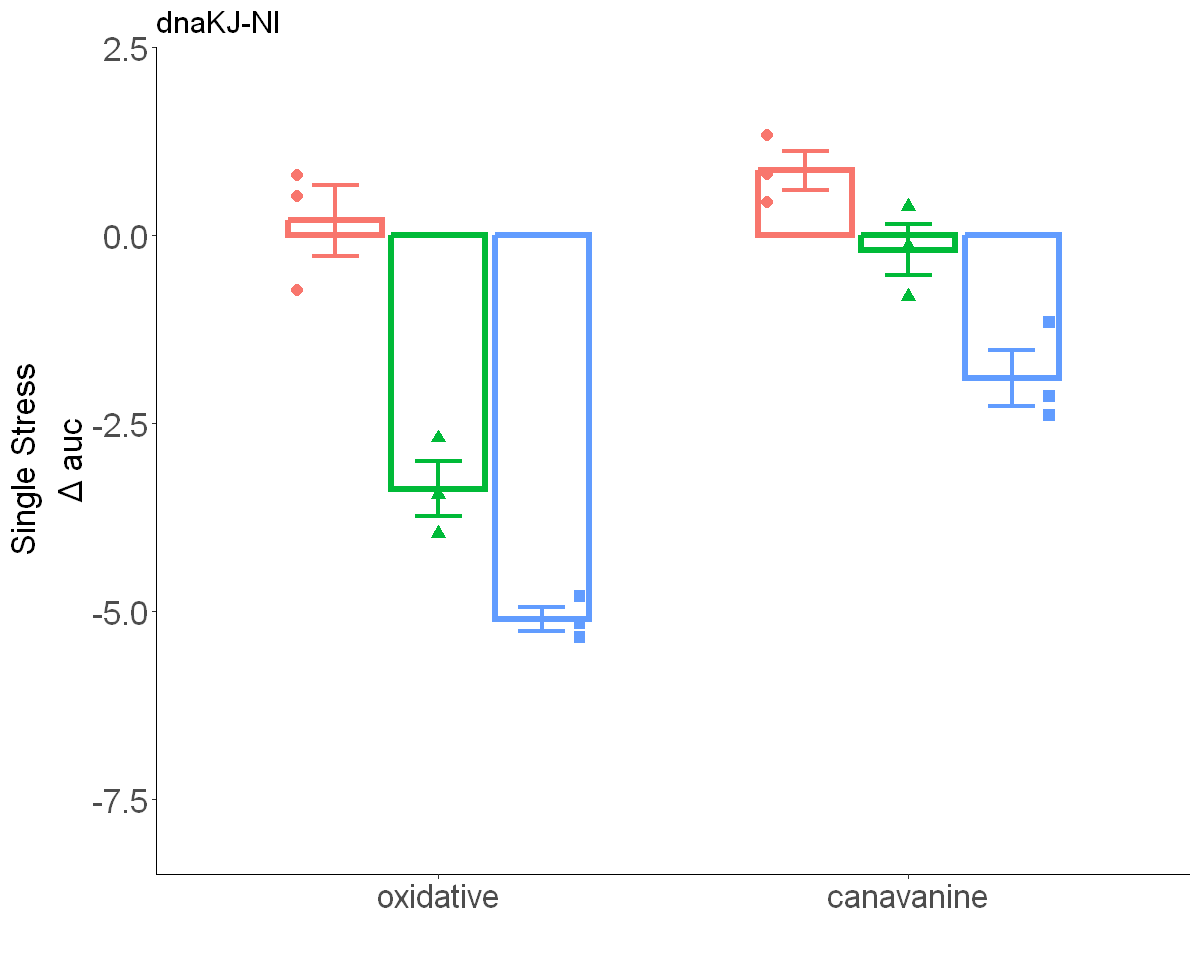

In [24]:
p5 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(-6, -2, -2)) +
labs(title="", x = "")+ylab(expression(atop( paste("Single Stress"),"\u394 auc")))+
   theme_classic() +ggtitle("dnaKJ-NI")+theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+ylim(-8,2)
p5

In [25]:
## Double stress plot for WT

In [26]:
df <- read.table("2023-02-15-wt-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(auc_fit!="NA")%>%filter(condition!="heat_control")
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(auc_fit), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'auc_fit'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


TableGrob (5 x 5) "guide-box": 2 grobs
                                    z     cells                  name
99_7482767047643dd39a59fb9e6f238fc7 1 (3-3,3-3)                guides
                                    0 (2-4,2-4) legend.box.background
                                              grob
99_7482767047643dd39a59fb9e6f238fc7 gtable[layout]
                                    zeroGrob[NULL]

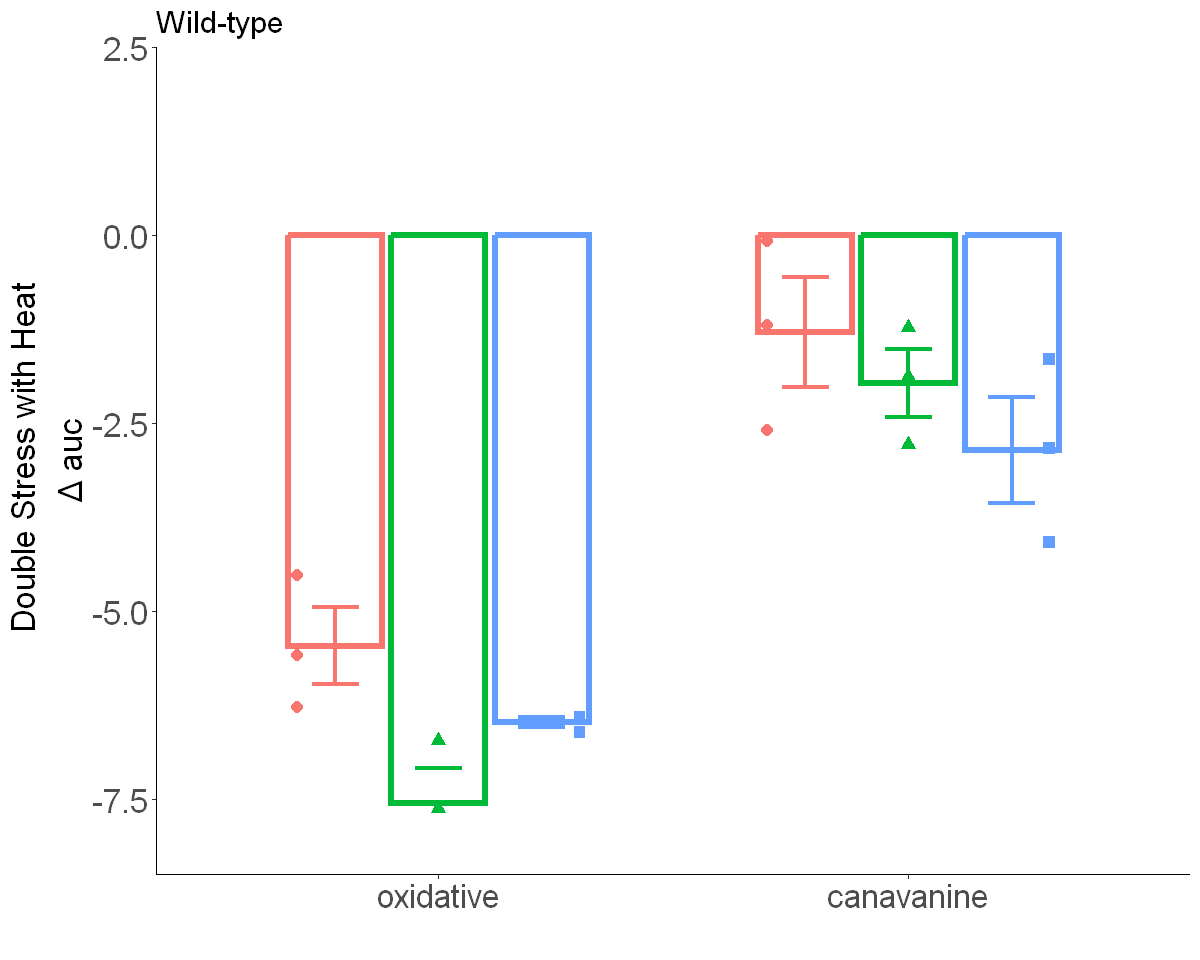

In [27]:
p6 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(0, -10, -2.5)) +
labs(title="", x = "")+ylab(expression(atop( paste("Double Stress with Heat"),"\u394 auc")))+
   theme_classic() +ggtitle("Wild-type")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+
theme(legend.title=element_blank())+
theme(legend.justification = "top")+theme(legend.position="bottom")+theme(plot.title = element_text(size=24))+theme(legend.text=element_text(size=24))+ylim(-8,2)
legend <- get_legend(p6)
p6 <- p6 +theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))
p6
legend

In [28]:
## Double stress plot for dKJ

In [29]:
df <- read.table("2023-02-16-cpc237-medheat-doublestress_auc_data.tsv",header=TRUE)%>%filter(auc_fit!="NA")%>%filter(condition!="heat_control")
df$condition <- factor(df$condition,levels=unique(df$condition))
df$stress <- factor(df$stress,levels=c("oxidative","canavanine"))
df1s <- df%>%group_by(stress,condition)%>%summarise_at(vars(auc_fit), list(Ind = mean,se=std.error))
colnames(df)[colnames(df) == 'auc_fit'] <- 'ci'

Warning message:
"Duplicated aesthetics after name standardisation: size"
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


NULL

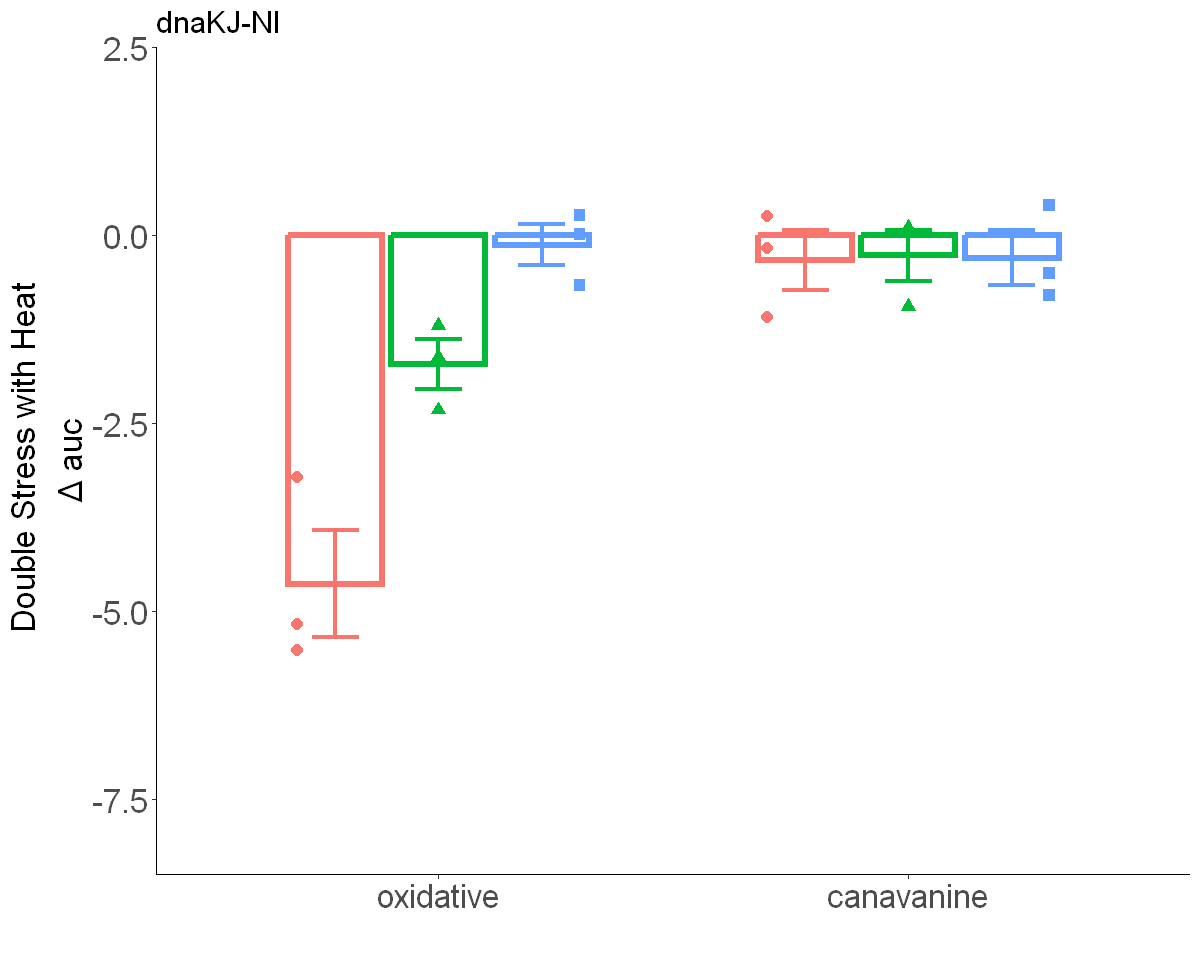

In [30]:
p7 <- ggplot(df1s, aes(x=stress, y=Ind, fill=condition)) + 
  geom_bar(aes(color=condition),fill="white",stat="identity",position=position_dodge(0.66),width=0.6,size=1.9) +
  geom_errorbar(data=df1s,aes(ymin=Ind-se, ymax=Ind+se,color=condition), width=.30,size=1.2,
                 position=position_dodge(.66))+geom_point(data=df, aes(stress, ci, group=condition,color=condition,shape=condition),size=3,position = position_dodge(width = 0.9), size=5, show.legend=FALSE)+  
#scale_y_continuous(breaks = seq(0, -10, -2.5)) +
labs(title="", x = "")+ylab(expression(atop( paste("Double Stress with Heat"),"\u394 auc")))+
   theme_classic() +ggtitle("dnaKJ-NI")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))+
theme(legend.title=element_blank())+
theme(legend.justification = "top")+theme(legend.position="bottom")+theme(plot.title = element_text(size=24))+theme(legend.text=element_text(size=24))+ylim(-8,2)
legend <- get_legend(p6)
p7 <- p7 +theme(legend.position="none")+theme(plot.title = element_text(size = 18),axis.text=element_text(size=20),axis.title=element_text(size=20))
p7
legend

In [33]:
p0 <- ggplot() + theme_void()

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


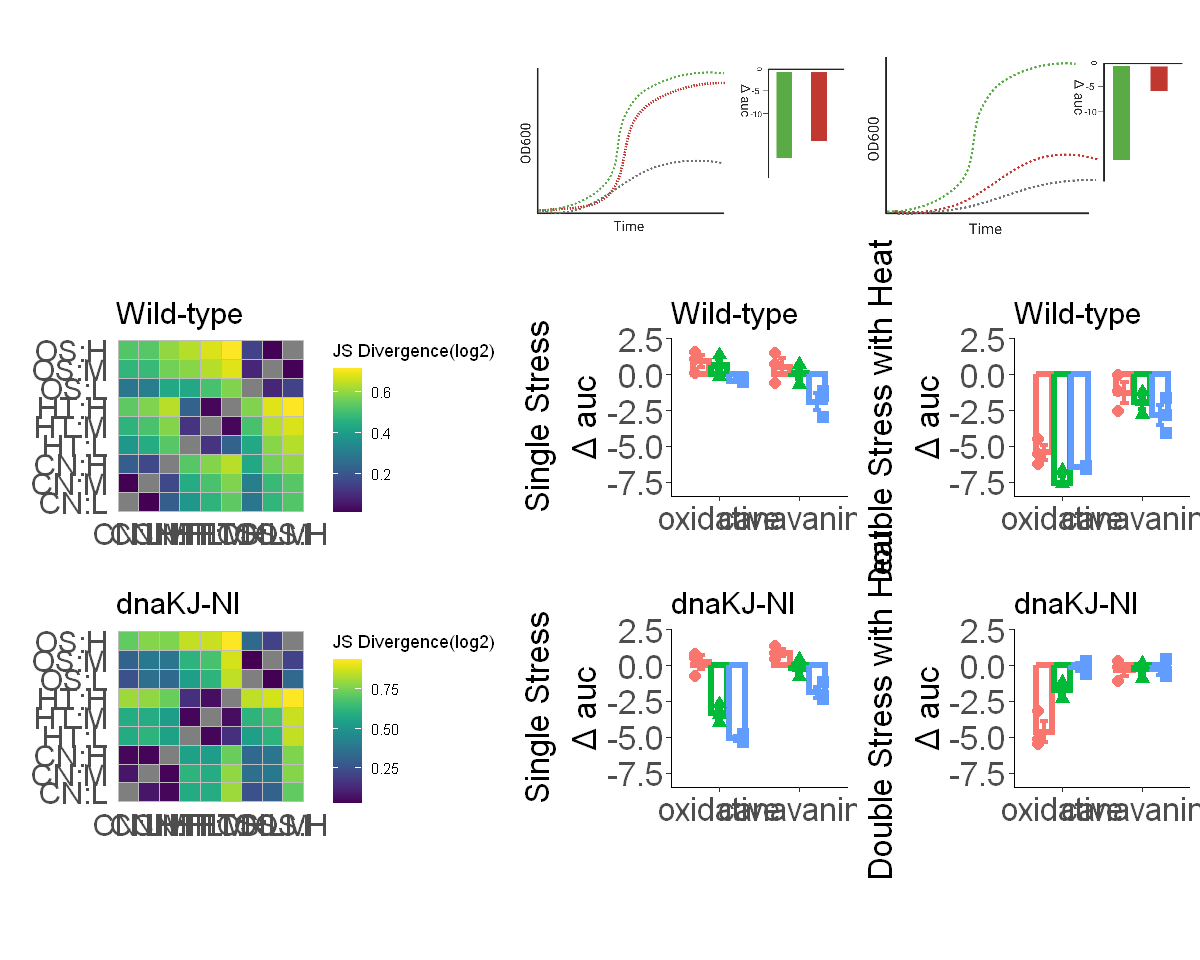

In [36]:
p <- grid.arrange(arrangeGrob(p0,p1,p2),arrangeGrob(p3_1,p4,p5),arrangeGrob(p3_2,p6,p7),legend,ncol=3,nrow=2, widths=c(1.5,1,1),heights=c(1,0.1))

In [38]:
ggsave(filename = "../../../PNAS/FIGURES/Fig4_final_v2.pdf",plot = p, width = 25,height = 20, dpi = 300, units = "in")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font metrics unknown for Unicode character U+0394"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font metrics unknown for Unicode character U+0394"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Δ auc' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font metrics unknown for 